In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
#Checking the null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
print('Shape of the dataset is ',df.shape)

Shape of the dataset is  (100000, 9)


In [7]:
#Summary of the data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
#value counts of the categorical features
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

The given dataset is imbalanced

# Univariate Analysis

In [9]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

<AxesSubplot: xlabel='diabetes', ylabel='count'>

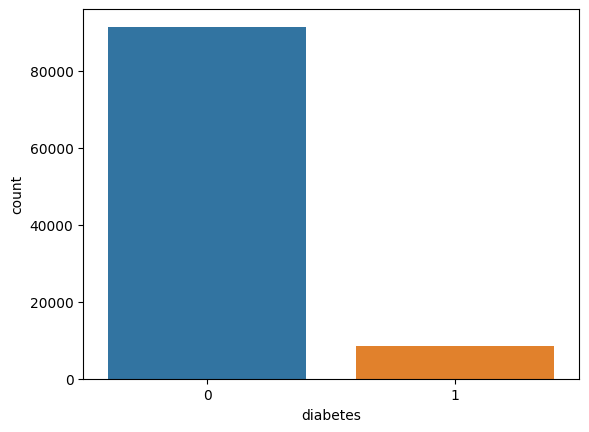

In [10]:
sns.countplot(data=df,x='diabetes')

<AxesSubplot: xlabel='smoking_history', ylabel='count'>

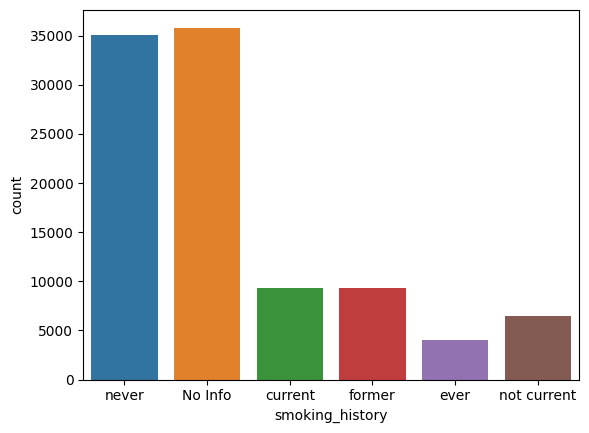

In [11]:
sns.countplot(data=df,x='smoking_history')

<AxesSubplot: xlabel='gender', ylabel='count'>

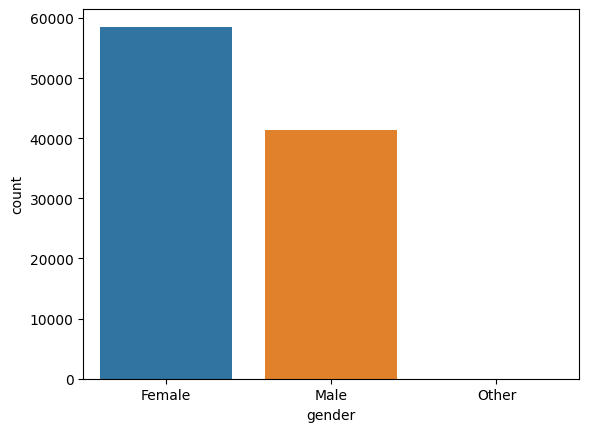

In [12]:
sns.countplot(data=df,x='gender')

<AxesSubplot: >

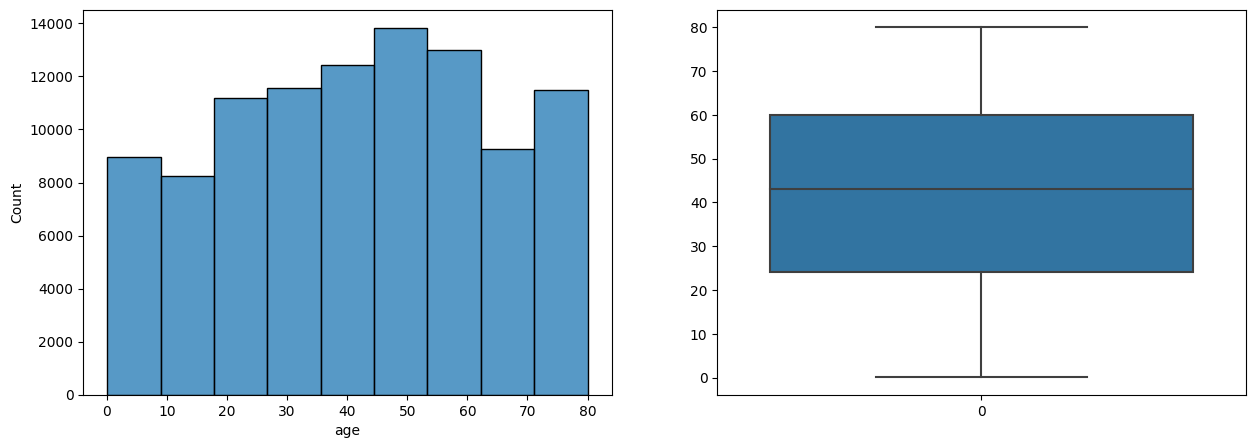

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)

sns.histplot(df['age'], bins=9, ax=axes[0, 0])
sns.boxplot(df['age'], ax=axes[0, 1])

<AxesSubplot: xlabel='hypertension', ylabel='count'>

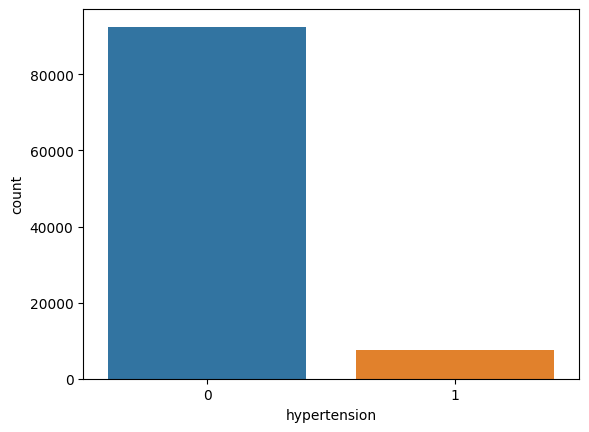

In [14]:
sns.countplot(data=df,x='hypertension')

<AxesSubplot: xlabel='heart_disease', ylabel='count'>

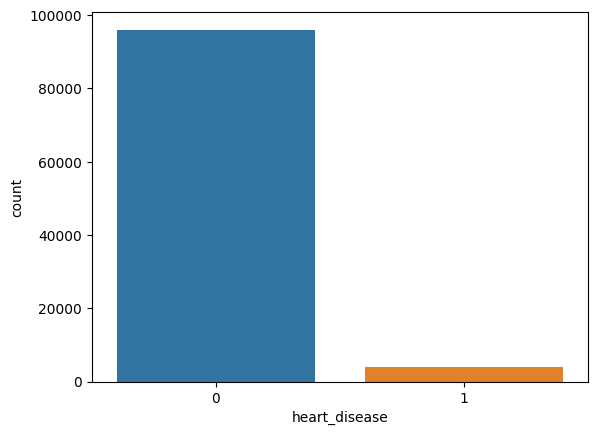

In [15]:
sns.countplot(data=df,x='heart_disease')

<AxesSubplot: >

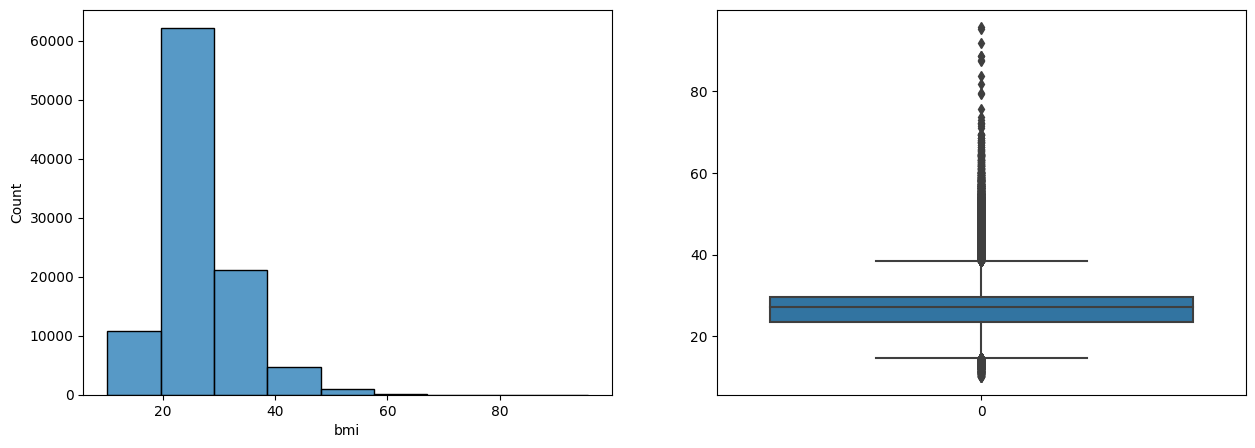

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)

sns.histplot(df['bmi'], bins=9, ax=axes[0, 0])
sns.boxplot(df['bmi'], ax=axes[0, 1])

<AxesSubplot: >

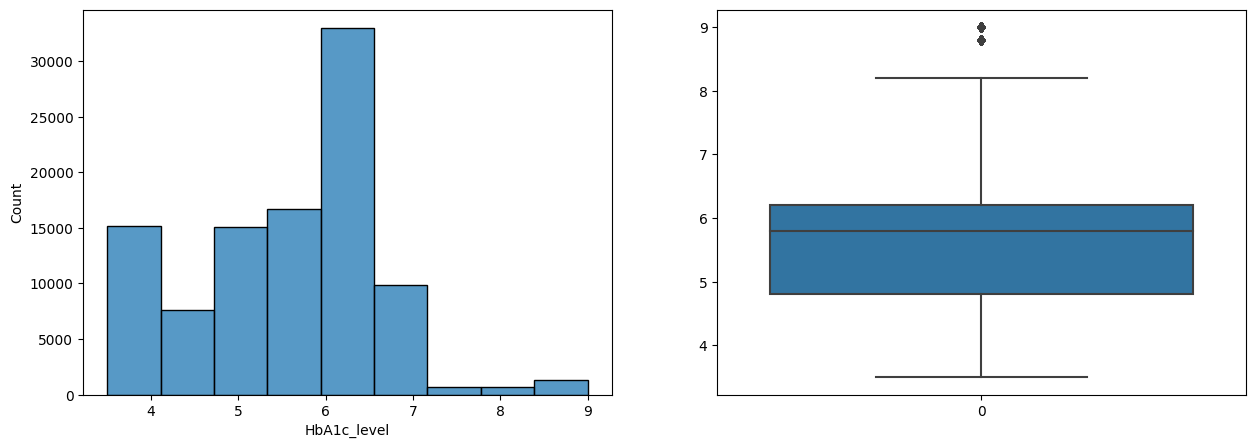

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)

sns.histplot(df['HbA1c_level'], bins=9, ax=axes[0, 0])
sns.boxplot(df['HbA1c_level'], ax=axes[0, 1])

<AxesSubplot: >

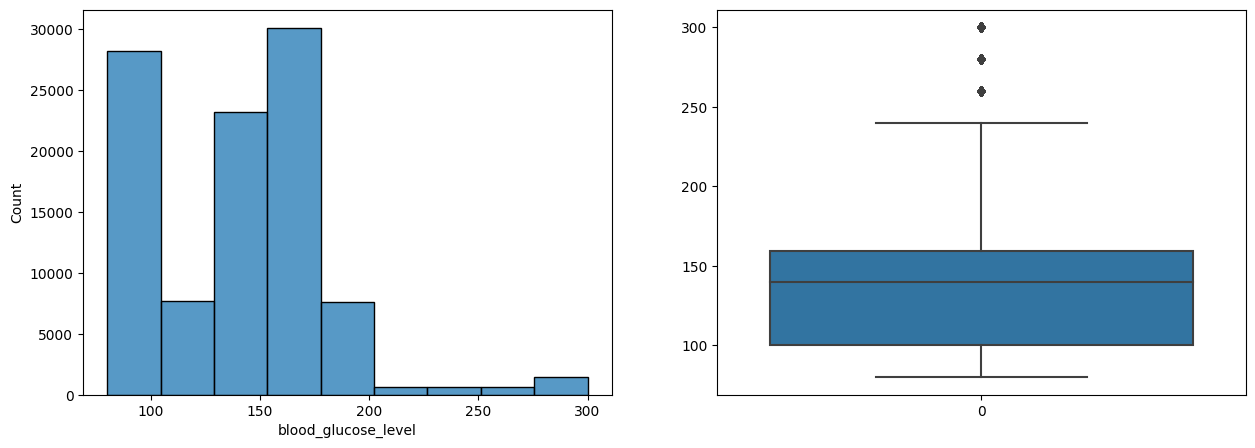

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)

sns.histplot(df['blood_glucose_level'], bins=9, ax=axes[0, 0])
sns.boxplot(df['blood_glucose_level'], ax=axes[0, 1])

# Multivariate Analysis

<AxesSubplot: >

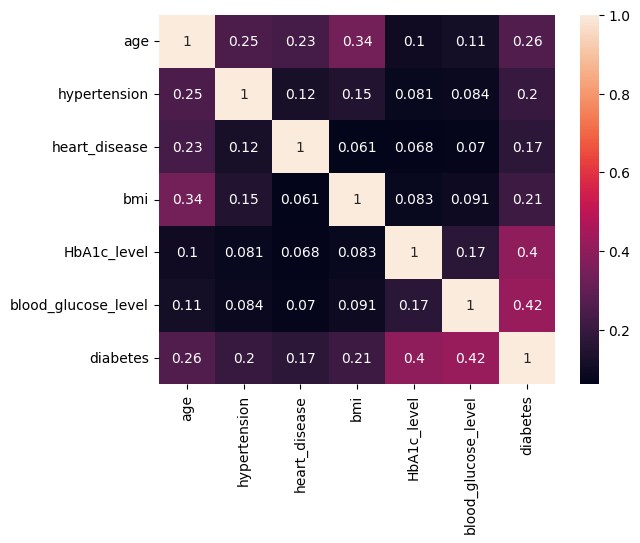

In [19]:
corr=df.drop(columns=['gender','smoking_history']).corr()
sns.heatmap(corr,annot=True)

<AxesSubplot: xlabel='age', ylabel='Count'>

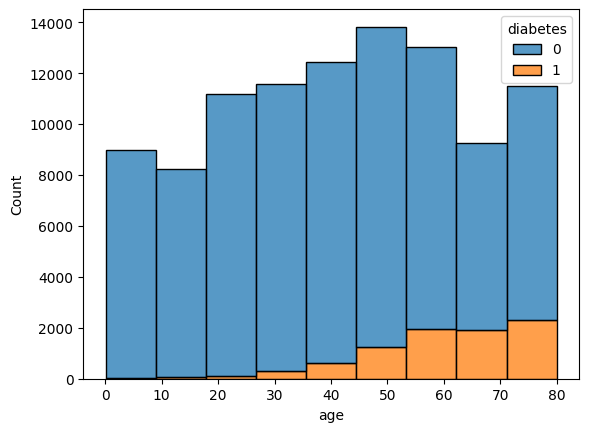

In [20]:
sns.histplot(data=df,x='age',bins =9,hue='diabetes',multiple='stack')

<AxesSubplot: xlabel='diabetes', ylabel='count'>

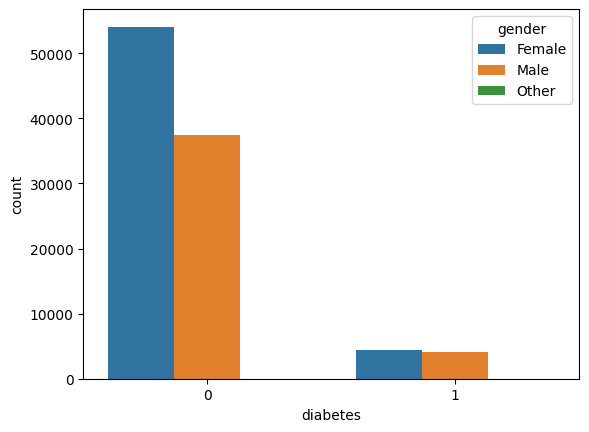

In [21]:
sns.countplot(data=df,x='diabetes',hue='gender')

In [22]:
# Making a function to remove the outlier after taking the datadrame and the columns from which the outliers is to be removed

def remove_outlier(data,column):
    factor=1.5
    q3,q1 = np.percentile(data[column].values,[75,25])
    iqr = q3-q1
    low_lim = q1-factor*iqr
    high_lim = q3+factor*iqr
    filtered_data = data[(data[column]<high_lim) & (data[column]>low_lim)]
    
    return filtered_data

# Data Pre processing

In [23]:
#for preprocessing
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split

#for predictive model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

#For finfing the performance of the model
from sklearn import metrics

In [24]:
df1=df.copy()

In [25]:
df1 = remove_outlier(df1,'bmi')
df1.shape

(92914, 9)

In [26]:
df1['diabetes'].value_counts()

0    85892
1     7022
Name: diabetes, dtype: int64

In [27]:
#One hot encoding
df2 = pd.get_dummies(df1)

In [28]:
X = np.array(df2.drop(columns=['diabetes']))
y = np.array(df2['diabetes'])

In [29]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [30]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in skf.split(X, y): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

# Decision Tree

Accuracy =  0.9545386325705614
Recall_score =  0.7287133287133287
Precision =  0.6890316562325272
f1_score =  0.7079747828951167
r2_score =  0.3492793878683015


<AxesSubplot: >

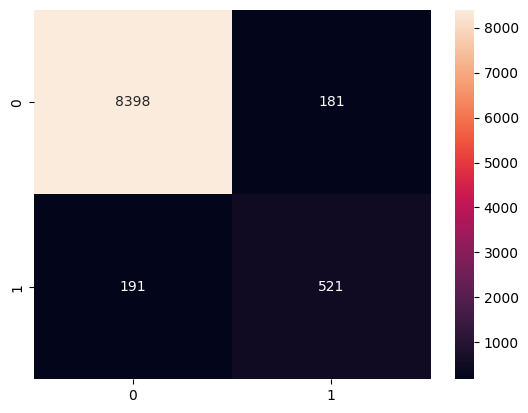

In [38]:
acc=0
f1=0
rec=0
prec=0
r2=0
dt=DecisionTreeClassifier()
for train_index, test_index in skf.split(X, y): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    acc=acc+metrics.accuracy_score(y_test,pred)
    rec=rec+metrics.recall_score(y_test,pred)
    prec=prec+metrics.precision_score(y_test,pred)
    f1=f1+metrics.f1_score(y_test,pred)
    r2=r2+metrics.r2_score(y_test,pred)

print('Accuracy = ',acc/10)
print('Recall_score = ',rec/10)
print('Precision = ',prec/10)
print('f1_score = ',f1/10)
print('r2_score = ',r2/10)

sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='g')

# Logistic Regression

Accuracy =  0.9641819174476867
Recall_score =  0.614358285410917
Precision =  0.8745777326489954
f1_score =  0.7215553755268777
r2_score =  0.4873143276503925


<AxesSubplot: >

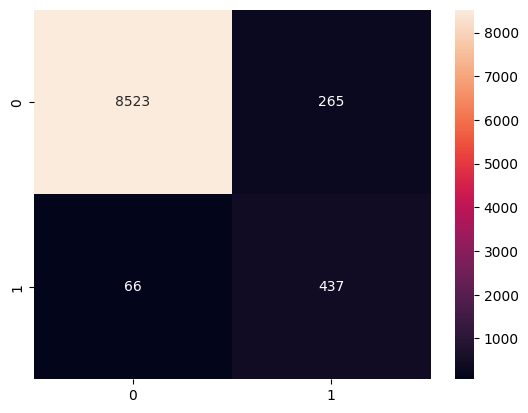

In [39]:
acc=0
f1=0
rec=0
prec=0
r2=0
lr=LogisticRegression()
for train_index, test_index in skf.split(X, y): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    acc=acc+metrics.accuracy_score(y_test,pred)
    rec=rec+metrics.recall_score(y_test,pred)
    prec=prec+metrics.precision_score(y_test,pred)
    f1=f1+metrics.f1_score(y_test,pred)
    r2=r2+metrics.r2_score(y_test,pred)

print('Accuracy = ',acc/10)
print('Recall_score = ',rec/10)
print('Precision = ',prec/10)
print('f1_score = ',f1/10)
print('r2_score = ',r2/10)

sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='g')

#  k Nearest Neighbor

Accuracy =  0.9654504359057152
Recall_score =  0.5698005698005698
Precision =  0.954653937947494
f1_score =  0.7136485280999109
r2_score =  0.5053616581733942


<AxesSubplot: >

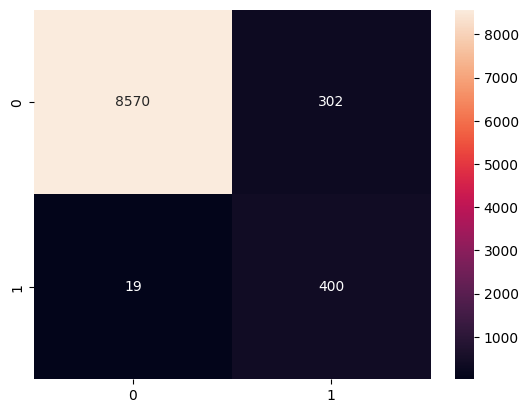

In [40]:
acc=0
f1=0
rec=0
prec=0
r2=0
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
prec=metrics.precision_score(y_test,pred)
f1=metrics.f1_score(y_test,pred)
r2=metrics.r2_score(y_test,pred)

print('Accuracy = ',acc)
print('Recall_score = ',rec)
print('Precision = ',prec)
print('f1_score = ',f1)
print('r2_score = ',r2)

sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='g')

# svc

Accuracy =  0.9652351738241309
Recall_score =  0.584045584045584
Precision =  0.9297052154195011
f1_score =  0.7174103237095363
r2_score =  0.502279799345814


<AxesSubplot: >

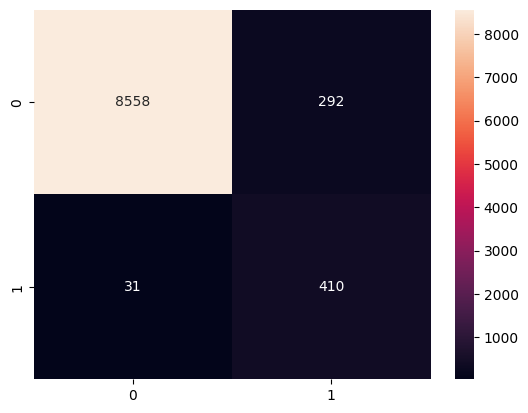

In [41]:
acc=0
f1=0
rec=0
prec=0
r2=0
svc=SVC(kernel = 'linear')
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
prec=metrics.precision_score(y_test,pred)
f1=metrics.f1_score(y_test,pred)
r2=metrics.r2_score(y_test,pred)

print('Accuracy = ',acc)
print('Recall_score = ',rec)
print('Precision = ',prec)
print('f1_score = ',f1)
print('r2_score = ',r2)

sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='g')

# Random Forest

Accuracy =  0.97513722957701
Recall_score =  0.6709401709401709
Precision =  1.0
f1_score =  0.80306905370844
r2_score =  0.6440453054144986


<AxesSubplot: >

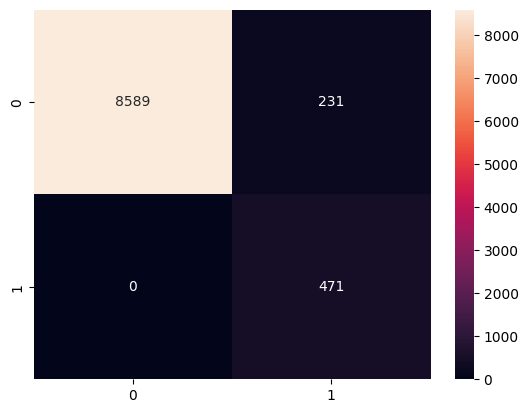

In [43]:
acc=0
f1=0
rec=0
prec=0
r2=0
rf=RandomForestClassifier(random_state=2, max_depth=5, criterion='entropy')
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
prec=metrics.precision_score(y_test,pred)
f1=metrics.f1_score(y_test,pred)
r2=metrics.r2_score(y_test,pred)

print('Accuracy = ',acc)
print('Recall_score = ',rec)
print('Precision = ',prec)
print('f1_score = ',f1)
print('r2_score = ',r2)

sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='g')

# Ada Boost

Accuracy =  0.9749219674954257
Recall_score =  0.6851851851851852
Precision =  0.9756592292089249
f1_score =  0.8050209205020922
r2_score =  0.6409634465869185


<AxesSubplot: >

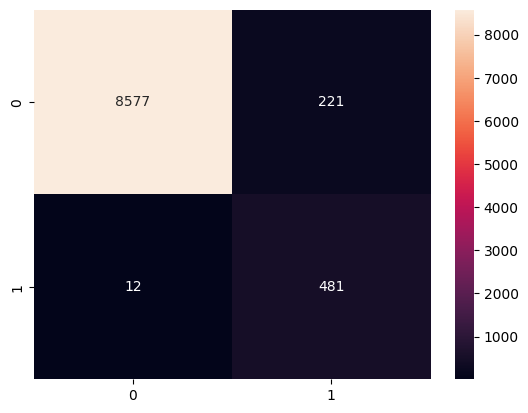

In [44]:
acc=0
f1=0
rec=0
prec=0
r2=0
ab=AdaBoostClassifier(random_state=2)
ab.fit(X_train,y_train)
pred=ab.predict(X_test)
acc=metrics.accuracy_score(y_test,pred)
rec=metrics.recall_score(y_test,pred)
prec=metrics.precision_score(y_test,pred)
f1=metrics.f1_score(y_test,pred)
r2=metrics.r2_score(y_test,pred)

print('Accuracy = ',acc)
print('Recall_score = ',rec)
print('Precision = ',prec)
print('f1_score = ',f1)
print('r2_score = ',r2)

sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='g')

The dataset presented a significant class imbalance, which could directly affect the performance of the predictive model. With that in mind, outliers were removed only from the variable with the highest occurrence, as removing outliers from other variables significantly reduced the number of positive instances in the target variable.

After applying this strategy, several models were trained, including Random Forest. It correctly predicted all instances of class 1, which is the class of interest, making it the best-performing model. In the context of health, specifically for diabetes, a false positive is less severe than a false negative. Misclassifying a person with diabetes as not having the disease can pose serious health risks.

Therefore, it can be concluded that the Random Forest model outperformed the others.